In [1]:
%pip install numpy matplotlib scipy
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pathlib import Path

image_path: Path = Path('/home/bent/Downloads/windytree.png')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Image is in grayscale, so only take the first channel
image: np.ndarray = imread(image_path)[..., 0]

image.shape, image.dtype

((960, 1280), dtype('float32'))

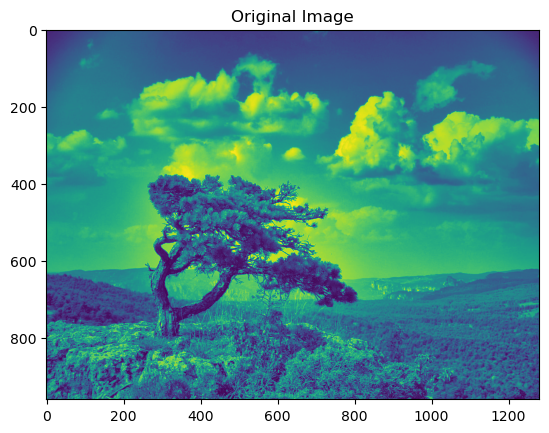

In [4]:
plt.imshow(image)
plt.title("Original Image")
plt.show()

In [5]:
U, S, VH = np.linalg.svd(image, full_matrices=False)

U.shape, S.shape, VH.shape

((960, 960), (960,), (960, 1280))

In [6]:
reconstruction = U @ np.diag(S) @ VH

print(
    "Reconstruction error (maximum MAE): {}".format(
        np.max(np.abs(image - reconstruction))
    )
)
reconstruction.shape


Reconstruction error (maximum MAE): 1.1920928955078125e-06


(960, 1280)

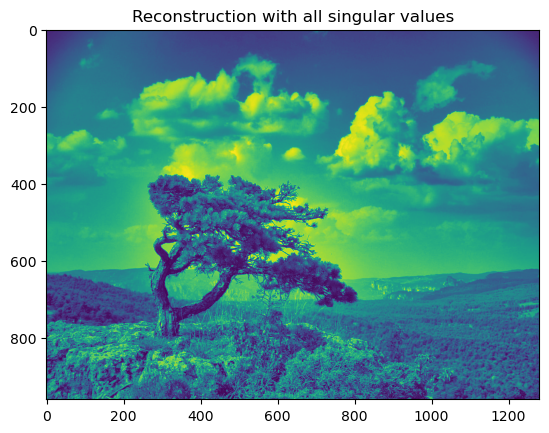

In [7]:
plt.imshow(reconstruction)
plt.title("Reconstruction with all singular values")
plt.show()

In [8]:
U.shape, np.diag(S).shape, VH.shape

((960, 960), (960, 960), (960, 1280))

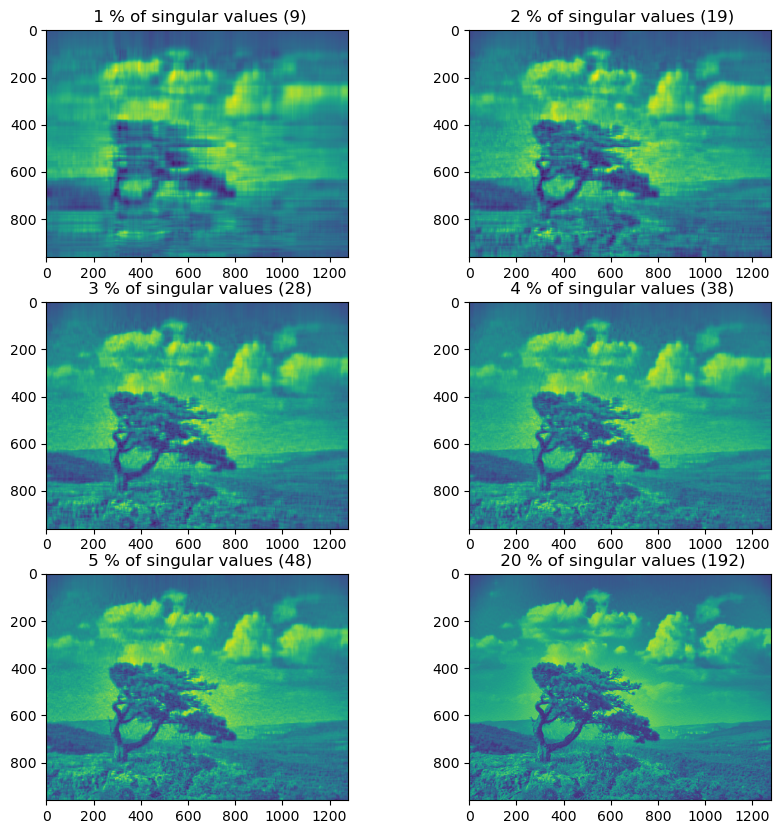

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

r: float = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.2])
n = (r * len(S)).astype(int)

for i, ax in enumerate(axs.flat):
    reconstruction = U[:, :n[i]] @ np.diag(S[:n[i]]) @ VH[:n[i], :]
    ax.imshow(reconstruction)
    ax.set_title(f"{100.0 * (r[i]): .0f} % of singular values ({n[i]})")

As we can see in the above, reconstruction with already 3 or 4 % of the singular values
produces a very good-looking compressed image.

At 20% of the singular values, the image looks just like the original one, except for missing
contrast in the tree.

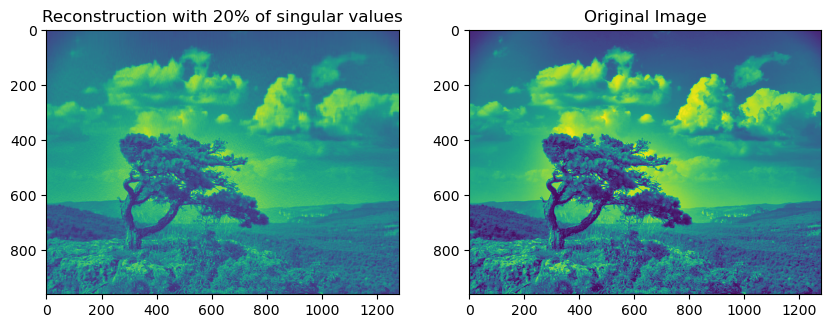

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(reconstruction)
axs[0].set_title("Reconstruction with 20% of singular values")

axs[1].imshow(image)
axs[1].set_title("Original Image")
plt.show()